In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [187]:
df = pd.read_csv('home_prices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


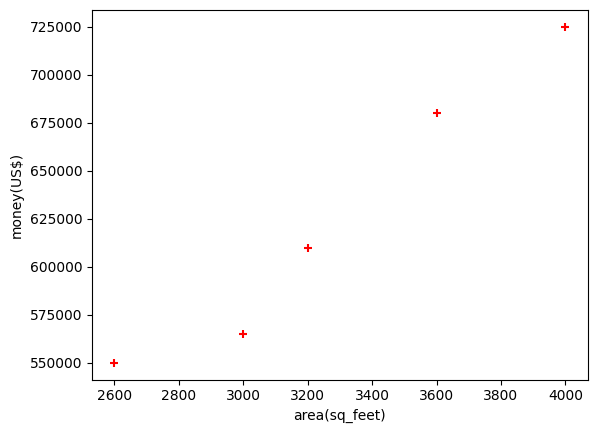

In [188]:
%matplotlib inline
plt.xlabel('area(sq_feet)')
plt.ylabel('money(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')

In [189]:
x = df.drop(['price'], axis = 'columns')
x.values

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000]], dtype=int64)

In [190]:
y = df.price
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [191]:
reg = linear_model.LinearRegression() #creating object for LinearRegression
reg.fit(x.values, y)

LinearRegression()

In [192]:
reg.predict([[3010]])

array([589337.32876712])

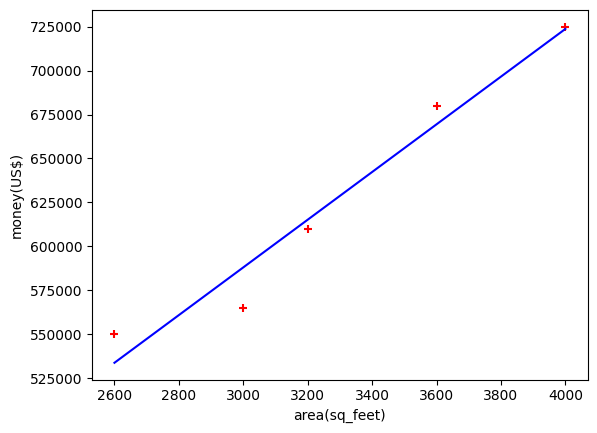

In [193]:
%matplotlib inline
plt.xlabel('area(sq_feet)')
plt.ylabel('money(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']].values), color = 'blue')

In [194]:
reg.score(x.values, y)

0.9584301138199486

In [195]:
# this is basically 'm' in "y = m * x + c"
reg.coef_

array([135.78767123])

In [196]:
# this is basically 'c' in "y = m * x + c"
reg.intercept_

180616.43835616432

In [197]:
# if we put all the values to find y . we have:
# m = 135.78767123
# c = 180616.43835616432
# x = 3010 from our above predict value
# by above predict we have y = 589337.32876712
# let's do the calculation :
135.78767123 * 3010 + 180616.43835616432

589337.3287584643

In [198]:
d = pd.read_csv('areas.csv')
d.head(5)

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [199]:
p = reg.predict(d.values)

In [200]:
d['prices'] = p
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [201]:
d.to_csv('prediction.csv', index = False)